In [1]:
# data analysis and wrangling

import numpy as np 
import pandas as pd 
from pandas import Series,DataFrame

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# machine learning

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

In [2]:
df_global_hunger_index = pd.read_csv("GHI2022 scores.csv", encoding= 'unicode_escape')
df_child_undernourished = pd.read_csv("Proportion of undernourished in the population.csv", encoding= 'unicode_escape')
df_child_wasting = pd.read_csv("Prevalence of wasting in children under five years.csv", encoding= 'unicode_escape')
df_child_stunting = pd.read_csv("Prevalence of stunting in children under five years.csv", encoding= 'unicode_escape')
df_child_mortality = pd.read_csv("Under-five mortality rate.csv", encoding= 'unicode_escape')

### Data Preprocessing

In [3]:
df_global_hunger_index.head()

,Country,2000,2007,2014,2022,Absolute change since 2014,% change since 2014
0,Afghanistan,50.3,38.7,30.6,29.9,-0.7,-2.3
1,Albania,20.7,15.8,9.2,6.2,-3.0,-32.6
2,Algeria,14.5,11.4,8.7,6.9,-1.8,-20.7
3,Angola,64.9,44.7,26.2,25.9,-0.3,-1.1
4,Argentina,6.6,5.5,5.0,6.8,1.8,36.0


In [4]:
#Dropping unnecessary columns

df_global_hunger_index.drop("Absolute change since 2014", inplace=True, axis=1)
df_global_hunger_index.drop("% change since 2014", inplace=True, axis=1)
df_global_hunger_index

,Country,2000,2007,2014,2022
0,Afghanistan,50.3,38.7,30.6,29.9
1,Albania,20.7,15.8,9.2,6.2
2,Algeria,14.5,11.4,8.7,6.9
3,Angola,64.9,44.7,26.2,25.9
4,Argentina,6.6,5.5,5.0,6.8
...,...,...,...,...,...
131,Venezuela (Boliv. Rep. of),14.6,10.1,8.1,19.9
132,Viet Nam,26.3,21.4,15.4,11.9
133,Yemen,41.3,38.4,41.7,45.1
134,Zambia,53.3,46.0,35.2,29.3


In [5]:
df_child_undernourished.head()

,Country,2000,2007,2014,2022
0,Afghanistan,47.8,29.8,20.7,29.8
1,Albania,4.9,8.3,5.0,3.9
2,Algeria,8.0,5.9,2.9,2.0
3,Angola,67.5,46.1,13.7,20.8
4,Argentina,3.0,3.3,2.0,3.7


In [6]:
df_child_wasting.head()

,Country,2000,2007,2014,2022
0,Afghanistan,10.9,8.3,9.5,5.1
1,Albania,12.2,8.5,4.5,1.6
2,Algeria,3.1,4.1,4.1,2.7
3,Angola,11.2,8.2,4.9,6.1
4,Argentina,1.7,1.2,1.6,2.7


In [7]:
df_child_stunting.head()

,Country,2000,2007,2014,2022
0,Afghanistan,50.6,51.1,40.4,38.2
1,Albania,39.2,25.0,15.2,11.3
2,Algeria,23.6,15.4,11.7,9.8
3,Angola,46.7,29.2,37.6,29.8
4,Argentina,10.5,8.2,8.3,12.3


In [8]:
df_child_mortality.head()

,Country,2000,2007,2014,2022
0,Afghanistan,12.9,10.0,7.4,5.8
1,Albania,2.7,1.7,1.0,1.0
2,Algeria,4.0,3.1,2.5,2.3
3,Angola,20.4,14.7,9.3,7.1
4,Argentina,2.0,1.6,1.2,0.9


In [9]:
#Check Null Values

df_global_hunger_index.isnull().sum()

Country     0
2000       19
2007       16
2014       15
2022       15
dtype: int64

In [10]:
#Remove null values

df_global_hunger_index.dropna()

,Country,2000,2007,2014,2022
0,Afghanistan,50.3,38.7,30.6,29.9
1,Albania,20.7,15.8,9.2,6.2
2,Algeria,14.5,11.4,8.7,6.9
3,Angola,64.9,44.7,26.2,25.9
4,Argentina,6.6,5.5,5.0,6.8
...,...,...,...,...,...
130,Uzbekistan,24.2,15.4,8.3,5.6
131,Venezuela (Boliv. Rep. of),14.6,10.1,8.1,19.9
132,Viet Nam,26.3,21.4,15.4,11.9
133,Yemen,41.3,38.4,41.7,45.1


In [11]:
#Check duplicate values

df_global_hunger_index.duplicated().sum()

0

### Data analysis

In [12]:
df_global_hunger_index.describe()

,2000,2007,2014,2022
count,117.000000,120.000000,121.000000,121.000000
mean,24.676068,20.401667,16.276860,15.220661
std,14.934452,12.819451,10.711231,10.307375
min,3.000000,3.000000,3.000000,3.000000
25%,11.600000,8.725000,7.400000,6.800000
50%,20.900000,18.000000,13.000000,13.200000
75%,37.000000,30.925000,25.500000,21.700000
max,64.900000,51.100000,44.600000,45.100000


In [13]:
df_countries = df_global_hunger_index['Country'].unique()
df_countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus',
       'Benin', 'Bhutan', 'Bolivia (Plurinat. State of)',
       'Bosnia & Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Republic of)', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Dem. Rep. of the Congo', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iran (Islamic Republic of)',
       'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Korea (DPR)',
       'Kuwait', 'Kyrgyzstan', 'Lao PDR', 'Latvia', 'Le

In [14]:
df_global_hunger_index.columns

Index(['Country', '2000', '2007', '2014', '2022'], dtype='object')

### Data Analysis and visualization

In [15]:
Countries = df_global_hunger_index["Country"].unique()
Countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus',
       'Benin', 'Bhutan', 'Bolivia (Plurinat. State of)',
       'Bosnia & Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Republic of)', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Dem. Rep. of the Congo', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iran (Islamic Republic of)',
       'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Korea (DPR)',
       'Kuwait', 'Kyrgyzstan', 'Lao PDR', 'Latvia', 'Le

In [16]:
Number_countries = df_global_hunger_index["Country"].unique().size
Number_countries

136

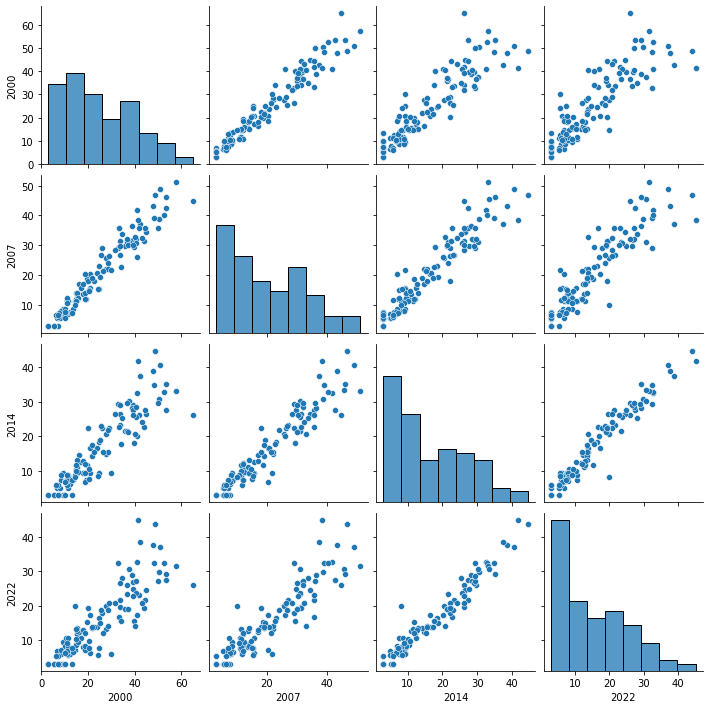

In [17]:
sns.pairplot(df_global_hunger_index)

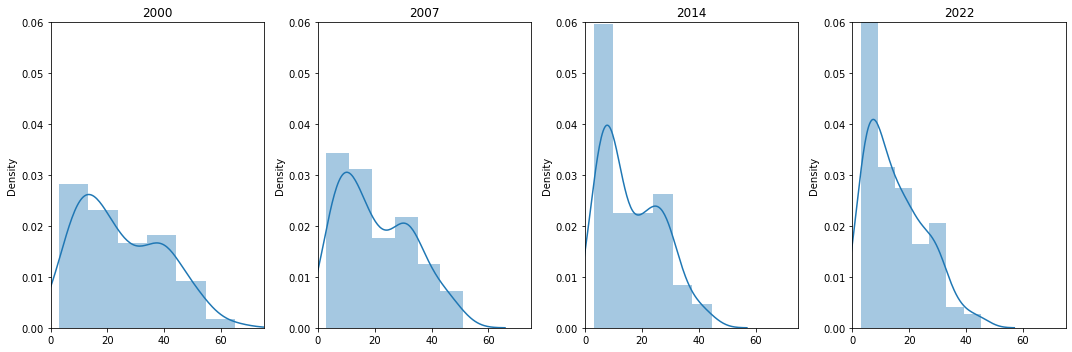

In [18]:
col=["2000","2007","2014","2022"]
fig = plt.figure(figsize=(15,5))

for i in range(len(col)):
    plt.subplot(1,4,i+1)
    plt.title(col[i])
    sns.distplot(df_global_hunger_index,x=df_global_hunger_index[col[i]])
    plt.xlim([0,75])
    plt.ylim([0,0.06])
plt.tight_layout()
plt.show()

In [19]:
df_GHI=df_global_hunger_index

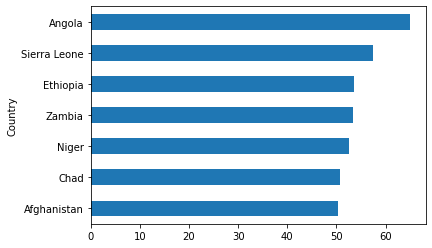

In [20]:
df_GHI[df_GHI["2000"]>=50].sort_values(by="2000",ascending=True).plot.barh(y="2000",x='Country',legend=False);

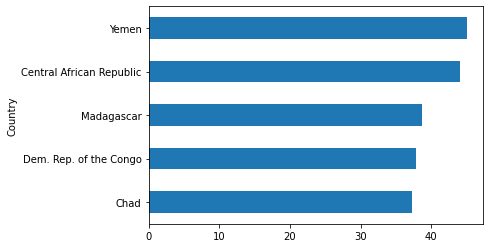

In [21]:
df_GHI[df_GHI["2022"]>=35].sort_values(by="2022",ascending=True).plot.barh(y="2022",x='Country',legend=False);

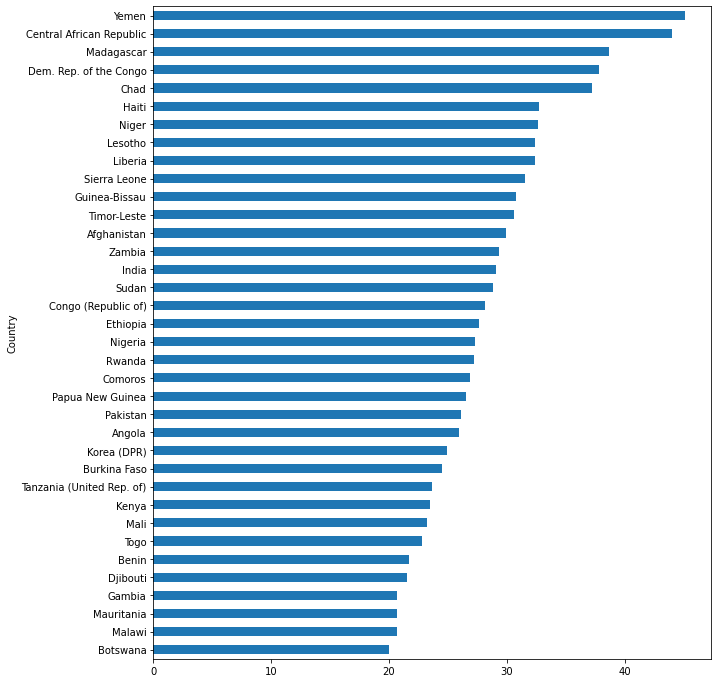

In [22]:
df_GHI[df_GHI["2022"]>=20].sort_values(by="2022",ascending=True).plot.barh(y="2022",x='Country',legend=False,figsize=(10, 12) );

In [23]:
((df_GHI["2022"] > 20) & (df_GHI["2022"] < 35)).sum()

30

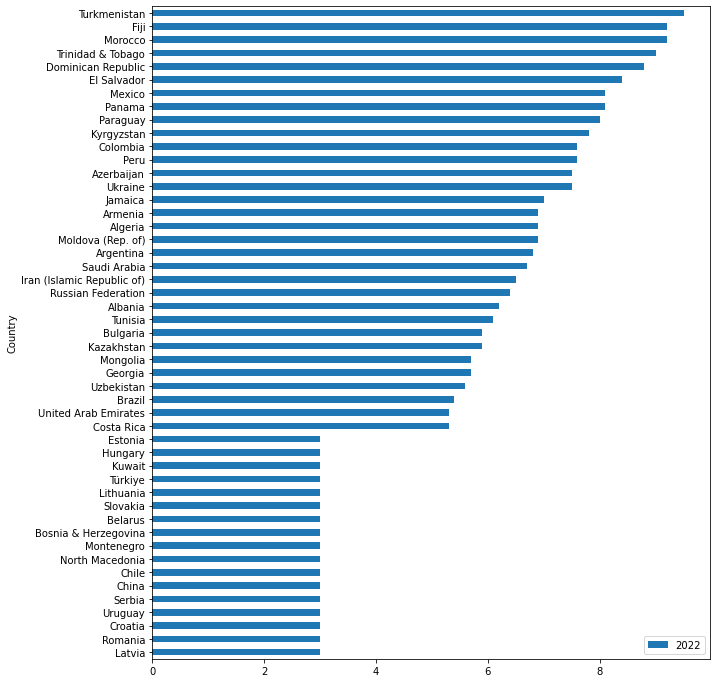

In [24]:
df_GHI[df_GHI["2022"]< 10].sort_values(by="2022",ascending=True).plot.barh(y="2022",x='Country',legend=True, figsize=(10, 12));
#plt.figure(figsize=(12, 50))

In [25]:
(df_GHI["2022"] < 10).sum()

49

Only 49 countries in world are in low category in 2022.

In [26]:
Low_Countries = df_GHI.where (df_GHI["2022"] < 10)
Low_Countries = Low_Countries.dropna()
Low_Countries

,Country,2000,2007,2014,2022
1,Albania,20.7,15.8,9.2,6.2
2,Algeria,14.5,11.4,8.7,6.9
4,Argentina,6.6,5.5,5.0,6.8
5,Armenia,19.3,12.1,7.3,6.9
6,Azerbaijan,24.9,15.3,9.3,7.5
9,Belarus,3.0,3.0,3.0,3.0
13,Bosnia & Herzegovina,9.3,6.6,3.0,3.0
15,Brazil,11.4,7.1,5.0,5.4
16,Bulgaria,8.6,7.9,7.4,5.9
24,Chile,3.0,3.0,3.0,3.0


In [27]:
High_Countries = df_GHI.where (df_GHI["2022"] > 18.2)
High_Countries = High_Countries.dropna()
High_Countries

,Country,2000,2007,2014,2022
0,Afghanistan,50.3,38.7,30.6,29.9
3,Angola,64.9,44.7,26.2,25.9
8,Bangladesh,33.9,31.3,26.3,19.6
10,Benin,33.8,26.9,23.2,21.7
14,Botswana,27.7,25.8,20.5,20.0
17,Burkina Faso,44.9,34.5,26.5,24.5
21,Cameroon,35.8,29.9,21.4,18.9
22,Central African Republic,48.8,46.8,44.6,44.0
23,Chad,50.7,49.0,40.7,37.2
27,Comoros,39.5,31.7,29.1,26.9


In [28]:
High_Countries["2022"].count()

42

In [29]:
#Let us see the impact of these 4 parameters (Child mortality, Under-nourishment, Child stunting and Child wasting) on the Global Hunger Index (GHI).

df_child_stunting.drop("Country", inplace=True, axis=1)
df_child_wasting.drop("Country", inplace=True, axis=1)
#df_child_stunting.drop("Country", inplace=True, axis=1)
df_child_mortality.drop("Country", inplace=True, axis=1)

In [30]:
df_global_hunger_index.rename(columns={'2000':'GHI2000','2007': 'GHI2007', '2014':'GHI2014','2022':'GHI2022' }, inplace=True)
#f_global_hunger_index.head()
df_child_undernourished.rename(columns={'2000':'Nouri2000', '2007':'Nouri2007', '2014': 'Nouri2014','2022':'Nouri2022' }, inplace=True)
df_child_wasting.rename(columns={'2000':'wast2000','2007':'wast2007', '2014': 'wast2014','2022':'wast2022' }, inplace=True)
df_child_stunting.rename(columns={'2000':'stunt2000', '2007':'stunt2007', '2014': 'stunt2014','2022':'stunt2022' }, inplace=True)
df_child_mortality.rename(columns={'2000':'Morta2000', '2007':'Morta2007', '2014': 'Morta2014','2022':'Morta2022' }, inplace=True)

In [31]:
# frames = [df_global_hunger_index, df_child_undernourished, df_child_wasting, df_child_stunting, df_child_mortality]

# df = pd.concat(frames)
df = pd.concat([df_global_hunger_index, df_child_undernourished, df_child_wasting, df_child_stunting, df_child_mortality], axis=1)
df.head()

,Country,GHI2000,GHI2007,GHI2014,GHI2022,Country,Nouri2000,Nouri2007,Nouri2014,Nouri2022,...,wast2014,wast2022,stunt2000,stunt2007,stunt2014,stunt2022,Morta2000,Morta2007,Morta2014,Morta2022
0,Afghanistan,50.3,38.7,30.6,29.9,Afghanistan,47.8,29.8,20.7,29.8,...,9.5,5.1,50.6,51.1,40.4,38.2,12.9,10.0,7.4,5.8
1,Albania,20.7,15.8,9.2,6.2,Albania,4.9,8.3,5.0,3.9,...,4.5,1.6,39.2,25.0,15.2,11.3,2.7,1.7,1.0,1.0
2,Algeria,14.5,11.4,8.7,6.9,Algeria,8.0,5.9,2.9,2.0,...,4.1,2.7,23.6,15.4,11.7,9.8,4.0,3.1,2.5,2.3
3,Angola,64.9,44.7,26.2,25.9,Angola,67.5,46.1,13.7,20.8,...,4.9,6.1,46.7,29.2,37.6,29.8,20.4,14.7,9.3,7.1
4,Argentina,6.6,5.5,5.0,6.8,Argentina,3.0,3.3,2.0,3.7,...,1.6,2.7,10.5,8.2,8.3,12.3,2.0,1.6,1.2,0.9


In [32]:
df = df.fillna(df.mean())
#df.fillna(value=0, inplace=True)
#df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    136 non-null    object 
 1   GHI2000    136 non-null    float64
 2   GHI2007    136 non-null    float64
 3   GHI2014    136 non-null    float64
 4   GHI2022    136 non-null    float64
 5   Country    136 non-null    object 
 6   Nouri2000  136 non-null    float64
 7   Nouri2007  136 non-null    float64
 8   Nouri2014  136 non-null    float64
 9   Nouri2022  136 non-null    float64
 10  wast2000   136 non-null    float64
 11  wast2007   136 non-null    float64
 12  wast2014   136 non-null    float64
 13  wast2022   136 non-null    float64
 14  stunt2000  136 non-null    float64
 15  stunt2007  136 non-null    float64
 16  stunt2014  136 non-null    float64
 17  stunt2022  136 non-null    float64
 18  Morta2000  136 non-null    float64
 19  Morta2007  136 non-null    float64
 20  Morta2014 

In [33]:
df.corr()

,GHI2000,GHI2007,GHI2014,GHI2022,Nouri2000,Nouri2007,Nouri2014,Nouri2022,wast2000,wast2007,wast2014,wast2022,stunt2000,stunt2007,stunt2014,stunt2022,Morta2000,Morta2007,Morta2014,Morta2022
GHI2000,1.000000,0.944637,0.885201,0.845170,0.850373,0.798193,0.691704,0.676769,0.637679,0.559703,0.497941,0.446211,0.808306,0.815176,0.786880,0.743816,0.820270,0.776009,0.748533,0.720376
GHI2007,0.944637,1.000000,0.947987,0.910252,0.843512,0.849286,0.762196,0.742730,0.619019,0.661155,0.553597,0.493907,0.789556,0.849700,0.822045,0.787158,0.808692,0.787748,0.774806,0.751568
GHI2014,0.885201,0.947987,1.000000,0.975957,0.742151,0.776683,0.834867,0.820469,0.624062,0.637369,0.622675,0.555539,0.768745,0.827129,0.848443,0.833808,0.765256,0.763157,0.770243,0.759498
GHI2022,0.845170,0.910252,0.975957,1.000000,0.715811,0.751060,0.838418,0.875887,0.584009,0.597103,0.579321,0.553005,0.726096,0.788523,0.817992,0.836975,0.738839,0.741943,0.752110,0.748160
Nouri2000,0.850373,0.843512,0.742151,0.715811,1.000000,0.925127,0.715905,0.681345,0.385838,0.385500,0.290386,0.264700,0.633037,0.669188,0.641127,0.601279,0.627919,0.577149,0.555133,0.528974
Nouri2007,0.798193,0.849286,0.776683,0.751060,0.925127,1.000000,0.835419,0.779693,0.344965,0.359693,0.278273,0.243763,0.606965,0.640547,0.619392,0.583896,0.600514,0.550259,0.539038,0.519846
Nouri2014,0.691704,0.762196,0.834867,0.838418,0.715905,0.835419,1.000000,0.945901,0.328961,0.321465,0.256611,0.218345,0.583097,0.622538,0.618548,0.624590,0.549047,0.521781,0.533013,0.531452
Nouri2022,0.676769,0.742730,0.820469,0.875887,0.681345,0.779693,0.945901,1.000000,0.320651,0.322292,0.261917,0.223744,0.552065,0.595437,0.609433,0.631820,0.565472,0.550791,0.561647,0.561847
wast2000,0.637679,0.619019,0.624062,0.584009,0.385838,0.344965,0.328961,0.320651,1.000000,0.803290,0.759320,0.734938,0.548944,0.564181,0.564419,0.533903,0.536336,0.546872,0.551013,0.543769
wast2007,0.559703,0.661155,0.637369,0.597103,0.385500,0.359693,0.321465,0.322292,0.803290,1.000000,0.831460,0.786530,0.501654,0.567866,0.558459,0.528701,0.469419,0.492131,0.510415,0.497539


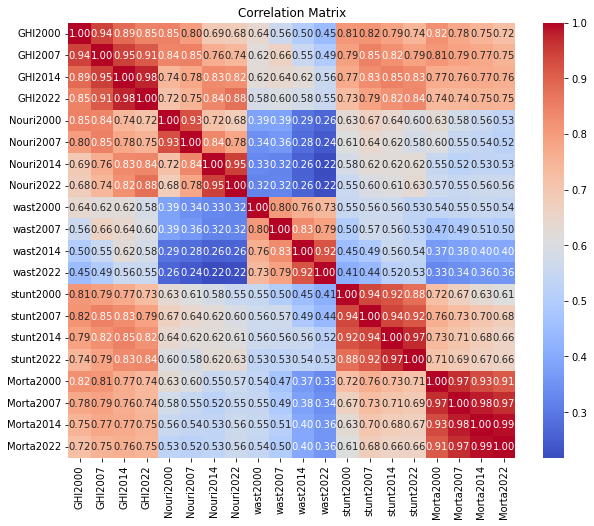

In [59]:


# compute correlation matrix
corr_matrix = df.corr()

# create heatmap of correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [34]:
#Predicting GHI based on the four parameters .

X = df[['Nouri2022', 'wast2022', 'stunt2022', 'Morta2022']]
#y = df['Year'].where(df['Year'] > 2000)
y = df['GHI2022']

In [35]:
X = X.dropna()
X

,Nouri2022,wast2022,stunt2022,Morta2022
0,29.800000,5.1,38.2,5.8
1,3.900000,1.6,11.3,1.0
2,2.000000,2.7,9.8,2.3
3,20.800000,6.1,29.8,7.1
4,3.700000,2.7,12.3,0.9
...,...,...,...,...
131,22.900000,5.0,22.2,2.4
132,5.700000,5.2,19.6,2.1
133,41.400000,16.1,55.5,6.0
134,30.900000,4.2,34.6,6.1


In [36]:
y = y.dropna()
y

0      29.900000
1       6.200000
2       6.900000
3      25.900000
4       6.800000
         ...    
131    19.900000
132    11.900000
133    45.100000
134    29.300000
135    15.220661
Name: GHI2022, Length: 136, dtype: float64

In [37]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [60]:
predictedGHI = regr.predict([[4, 4, 4, 4]])
predictedGHI

array([8.17344854])

In [61]:
predictedGHI = regr.predict([[4, 0, 0, 0]])
predictedGHI

array([2.17737244])

In [62]:
predictedGHI = regr.predict([[0, 4, 0, 0]])
predictedGHI

array([2.8236628])

In [63]:
predictedGHI = regr.predict([[0, 0, 4, 0]])
predictedGHI

array([0.86897917])

In [64]:
predictedGHI = regr.predict([[0, 0, 0, 4]])
predictedGHI

array([2.79457585])

As you can see from the above predictions, Child mortality has more weight than other parameters.

### Prediction Model

In [43]:
X= df_global_hunger_index.mean()
X.array.reshape(1, -1)
X

GHI2000    24.676068
GHI2007    20.401667
GHI2014    16.276860
GHI2022    15.220661
dtype: float64

In [44]:
y = [2000,2007,2014,2022]
y = pd.DataFrame (y)
y

,0
0,2000
1,2007
2,2014
3,2022


In [45]:
X.shape, y.shape

((4,), (4, 1))

In [46]:
X= X.values.reshape(-1,1)
X

array([[24.67606838],
       [20.40166667],
       [16.2768595 ],
       [15.22066116]])

In [47]:
X.shape

(4, 1)

In [48]:
y = y.values
y

array([[2000],
       [2007],
       [2014],
       [2022]], dtype=int64)

Text(0, 0.5, 'Year')

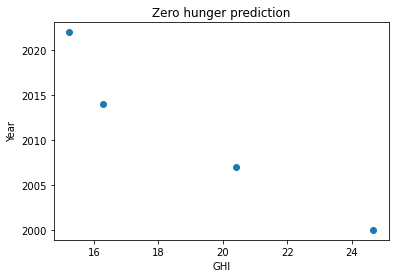

In [49]:
#Linear Regression Model

plt.scatter(X,y)
plt.title("Zero hunger prediction")
plt.xlabel("GHI")
plt.ylabel("Year")

In [50]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
model = lr.fit(X,y)

In [51]:
model.intercept_ 

array([2051.11144851])

In [52]:
model.coef_

array([[-2.1083285]])

In [53]:
#Model prediction

y_pred = model.predict(X)
y_pred

array([[1999.08619027],
       [2008.09803322],
       [2016.79448172],
       [2019.0212948 ]])

In [54]:
Prediction = model.predict([[10]])
Prediction

array([[2030.02816351]])

In [55]:
Prediction = model.predict([[0]])
Prediction

array([[2051.11144851]])

The prediction shows that the UN will reach zero hunger in 2051 if the countries maintain their speed between 2000 and 2022.

Text(0, 0.5, 'Year')

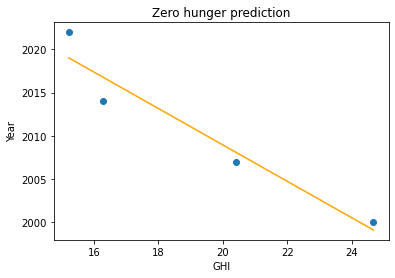

In [56]:
plt.scatter(X,y)
plt.plot(X, y_pred, color="orange")
plt.title("Zero hunger prediction")
plt.xlabel("GHI")
plt.ylabel("Year")

In [57]:
model.score(X,y)

0.9298124163597172

Our prediction model has an accuracy of 93%, meaning we have confidence in the predicted year.

### Time Series Analysis

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("GHI2022 scores.csv", encoding= 'unicode_escape')


In [10]:
df.columns = ['Country', 'GHI_2000', 'GHI_2007', 'GHI_2014', 'GHI_2022', 'Abs_Change_Since_2014', '%_Change_Since_2014']

In [11]:
df.set_index('Country', inplace=True)

In [12]:
df.head(4)

,GHI_2000,GHI_2007,GHI_2014,GHI_2022,Abs_Change_Since_2014,%_Change_Since_2014
Country,,,,,,
Afghanistan,50.3,38.7,30.6,29.9,-0.7,-2.3
Albania,20.7,15.8,9.2,6.2,-3.0,-32.6
Algeria,14.5,11.4,8.7,6.9,-1.8,-20.7
Angola,64.9,44.7,26.2,25.9,-0.3,-1.1


In [15]:
# Replace any missing values with 0
df.fillna(0, inplace=True)

In [16]:
# Convert the GHI index columns to numeric data type
df['GHI_2000'] = pd.to_numeric(df['GHI_2000'])
df['GHI_2007'] = pd.to_numeric(df['GHI_2007'])
df['GHI_2014'] = pd.to_numeric(df['GHI_2014'])
df['GHI_2022'] = pd.to_numeric(df['GHI_2022'])

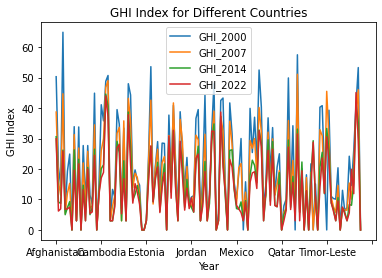

In [19]:
# Plot the GHI index for each country
df.plot(kind='line', y=['GHI_2000', 'GHI_2007', 'GHI_2014', 'GHI_2022'])

# Set the plot title and labels
plt.title('GHI Index for Different Countries')
plt.xlabel('Year')
plt.ylabel('GHI Index')

# Display the plot
plt.show()

### Building ARIMA model

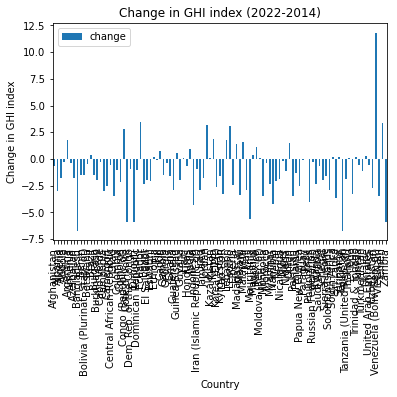

C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


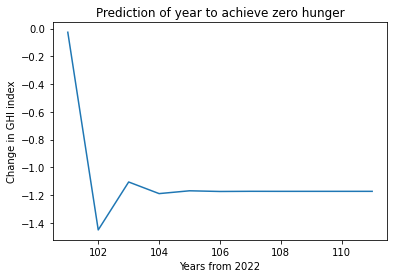

In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# read the dataset into a pandas dataframe
df = pd.read_csv("GHI2022 scores.csv", encoding= 'unicode_escape')

# drop any rows with missing values
df.dropna(inplace=True)

# select only the relevant columns for our analysis
df = df[['Country', '2014', '2022']]

# set the country column as the index
df.set_index('Country', inplace=True)

# calculate the difference between 2022 and 2014 GHI index
df['change'] = df['2022'] - df['2014']

# plot the data
df.plot(kind='bar', y='change')
plt.title('Change in GHI index (2022-2014)')
plt.xlabel('Country')
plt.ylabel('Change in GHI index')
plt.show()

# fit an ARIMA model to the data
model = ARIMA(df['change'], order=(1,1,1))
model_fit = model.fit()

# predict the year by which zero hunger will be achieved
prediction = model_fit.predict(len(df), len(df)+10, typ='levels')


plt.plot(prediction)
plt.title('Prediction of year to achieve zero hunger')
plt.xlabel('Years from 2022')
plt.ylabel('Change in GHI index')
plt.show()


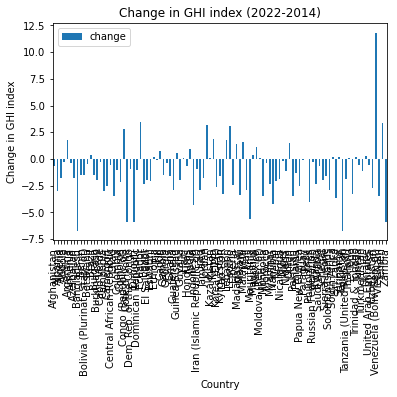

C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


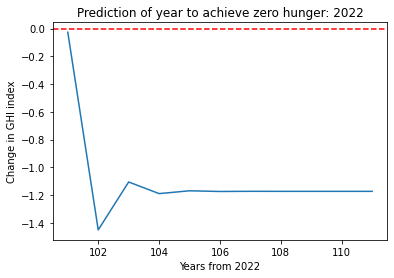

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# read the dataset into a pandas dataframe
df = pd.read_csv("GHI2022 scores.csv", encoding= 'unicode_escape')

# drop any rows with missing values
df.dropna(inplace=True)

# select only the relevant columns for our analysis
df = df[['Country', '2014', '2022']]

# set the country column as the index
df.set_index('Country', inplace=True)

# calculate the difference between 2022 and 2014 GHI index
df['change'] = df['2022'] - df['2014']

# plot the data
df.plot(kind='bar', y='change')
plt.title('Change in GHI index (2022-2014)')
plt.xlabel('Country')
plt.ylabel('Change in GHI index')
plt.show()

# fit an ARIMA model to the data
model = ARIMA(df['change'], order=(1,1,1))
model_fit = model.fit()

# predict the change in GHI index for the next 10 years
prediction = model_fit.predict(len(df), len(df)+10, typ='levels')

# determine the year when zero hunger will be achieved
for i, val in enumerate(prediction):
    if val <= 0:
        year = 2022 + i
        break

# plot the predicted values
plt.plot(prediction)
plt.axhline(0, color='r', linestyle='--')
plt.title(f'Prediction of year to achieve zero hunger: {year}')
plt.xlabel('Years from 2022')
plt.ylabel('Change in GHI index')
plt.show()


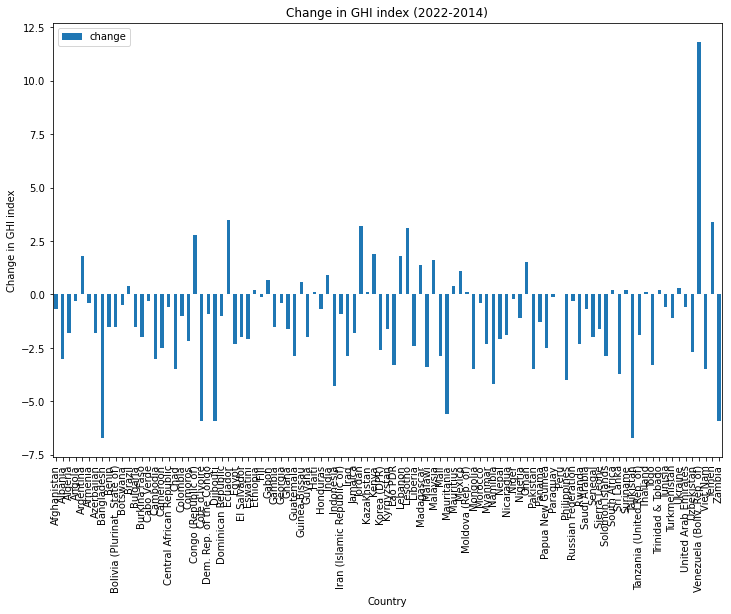

C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\KIIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


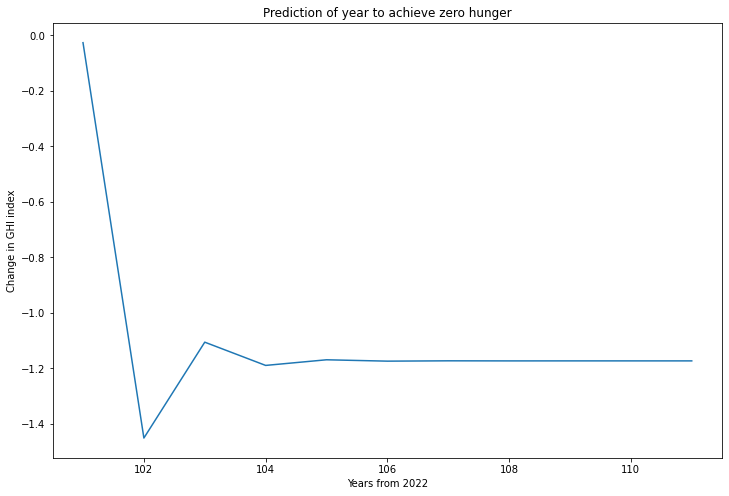

In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# read the dataset into a pandas dataframe
df = pd.read_csv("GHI2022 scores.csv", encoding= 'unicode_escape')

# drop any rows with missing values
df.dropna(inplace=True)

# select only the relevant columns for our analysis
df = df[['Country', '2014', '2022']]

# set the country column as the index
df.set_index('Country', inplace=True)

# calculate the difference between 2022 and 2014 GHI index
df['change'] = df['2022'] - df['2014']

# plot the data
fig, ax = plt.subplots(figsize=(12, 8))
df.plot(kind='bar', y='change', ax=ax)
ax.set_title('Change in GHI index (2022-2014)')
ax.set_xlabel('Country')
ax.set_ylabel('Change in GHI index')
plt.show()

# fit an ARIMA model to the data
model = ARIMA(df['change'], order=(1,1,1))
model_fit = model.fit()

# predict the year by which zero hunger will be achieved
prediction = model_fit.predict(len(df), len(df)+10, typ='levels')

# plot the prediction
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(prediction)
ax.set_title('Prediction of year to achieve zero hunger')
ax.set_xlabel('Years from 2022')
ax.set_ylabel('Change in GHI index')
plt.show()


### Neural Network Model

Epoch 1/100
8/8 - 0s - loss: 0.0226 - 367ms/epoch - 46ms/step
Epoch 2/100
8/8 - 0s - loss: 0.0212 - 12ms/epoch - 1ms/step
Epoch 3/100
8/8 - 0s - loss: 0.0211 - 12ms/epoch - 2ms/step
Epoch 4/100
8/8 - 0s - loss: 0.0207 - 13ms/epoch - 2ms/step
Epoch 5/100
8/8 - 0s - loss: 0.0206 - 13ms/epoch - 2ms/step
Epoch 6/100
8/8 - 0s - loss: 0.0202 - 12ms/epoch - 2ms/step
Epoch 7/100
8/8 - 0s - loss: 0.0201 - 13ms/epoch - 2ms/step
Epoch 8/100
8/8 - 0s - loss: 0.0198 - 12ms/epoch - 1ms/step
Epoch 9/100
8/8 - 0s - loss: 0.0197 - 14ms/epoch - 2ms/step
Epoch 10/100
8/8 - 0s - loss: 0.0195 - 12ms/epoch - 1ms/step
Epoch 11/100
8/8 - 0s - loss: 0.0195 - 13ms/epoch - 2ms/step
Epoch 12/100
8/8 - 0s - loss: 0.0192 - 14ms/epoch - 2ms/step
Epoch 13/100
8/8 - 0s - loss: 0.0191 - 12ms/epoch - 2ms/step
Epoch 14/100
8/8 - 0s - loss: 0.0189 - 15ms/epoch - 2ms/step
Epoch 15/100
8/8 - 0s - loss: 0.0188 - 14ms/epoch - 2ms/step
Epoch 16/100
8/8 - 0s - loss: 0.0186 - 14ms/epoch - 2ms/step
Epoch 17/100
8/8 - 0s - loss: 0

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 18ms/step


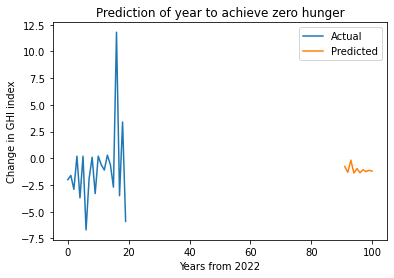

In [17]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# read the dataset into a pandas dataframe
df = pd.read_csv("GHI2022 scores.csv", encoding= 'unicode_escape')

# drop any rows with missing values
df.dropna(inplace=True)

# select only the relevant columns for our analysis
df = df[['Country', '2014', '2022']]

# set the country column as the index
df.set_index('Country', inplace=True)

# calculate the difference between 2022 and 2014 GHI index
df['change'] = df['2022'] - df['2014']

# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['change']])

# create input and output data
X = []
y = []
for i in range(3, len(scaled_data)):
    X.append(scaled_data[i-3:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)

# split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

# build a neural network model
model = Sequential()
model.add(Dense(10, input_dim=3, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=2)

# make predictions using the model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# invert the scaling of the predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# predict the year by which zero hunger will be achieved
last_3_years = df.iloc[-3:]['change'].values
last_3_years_scaled = scaler.transform(last_3_years.reshape(-1, 1))

prediction = []
for i in range(10):
    input_data = np.array(last_3_years_scaled[-3:, 0])
    input_data = np.reshape(input_data, (1, -1))
    pred = model.predict(input_data)
    prediction.append(pred[0][0])
    last_3_years_scaled = np.append(last_3_years_scaled, pred, axis=0)


# invert the scaling of the predictions
prediction = np.array(prediction).reshape(-1, 1)
prediction = scaler.inverse_transform(prediction)

# plot the results
plt.plot(df.iloc[-20:]['change'].values, label='Actual')
plt.plot(np.arange(len(df)-10, len(df)), prediction, label='Predicted')
plt.title('Prediction of year to achieve zero hunger')
plt.xlabel('Years from 2022')
plt.ylabel('Change in GHI index')
plt.legend()
plt.show()


### Clustering Analysis

In [26]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# read in the datasets
datasets = ["GHI2022 scores.csv", "Proportion of undernourished in the population.csv", "Prevalence of wasting in children under five years.csv", 
"Prevalence of stunting in children under five years.csv","Under-five mortality rate.csv"]

# create an initial dataframe with the first dataset
df = pd.read_csv(datasets[0], encoding='unicode_escape')
df = df[['Country', '2000', '2007', '2014', '2022']]

df.head(4)

,Country,2000,2007,2014,2022
0,Afghanistan,50.3,38.7,30.6,29.9
1,Albania,20.7,15.8,9.2,6.2
2,Algeria,14.5,11.4,8.7,6.9
3,Angola,64.9,44.7,26.2,25.9


In [29]:
# loop through the remaining datasets and join them on the 'Country' column
for dataset in datasets[1:]:
    temp_df = pd.read_csv(dataset, encoding='unicode_escape')
    temp_df = temp_df.drop_duplicates(subset='Country')
    df = pd.merge(df, temp_df, on='Country', how='inner')
    
# drop any rows with missing values
df.dropna(inplace=True)

# standardize the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.iloc[:, 1:])

# perform clustering analysis
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(df_scaled)

# add the cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# print the number of countries in each cluster
print(df.groupby('Cluster').size())



C:\Users\KIIT\AppData\Local\Temp\ipykernel_16908\2560335887.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'2022_x', '2000_x', '2014_x', '2007_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, temp_df, on='Country', how='inner')
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster
0    65
1    34
2    18
dtype: int64


The output of the clustering analysis shows the number of countries that fall into each cluster. This information can be used to identify common factors that contribute to food insecurity among the countries in each cluster. By analyzing the characteristics of the countries in each cluster, policymakers and aid organizations can develop targeted interventions that address the specific needs of each cluster.

For example, if one cluster has a higher proportion of countries with high under-five mortality rates, then interventions that focus on improving child health and reducing infant mortality may be effective for this group of countries. On the other hand, if another cluster has a higher proportion of countries with high prevalence of wasting in children under five years, then interventions that focus on improving access to nutrition and addressing poverty may be more effective for this group.

By identifying these clusters and understanding the specific needs of each group of countries, policymakers and aid organizations can develop more targeted and effective interventions to address food insecurity.

In [30]:
# group the dataframe by 'Cluster' and calculate the mean of each variable
df_means = df.groupby('Cluster').mean()

# print the mean values for each variable in each cluster
print(df_means)


            2000_x     2007_x     2014_x     2022_x     2000_y     2007_y  \
Cluster                                                                     
0        13.412308  10.776923   8.030769   7.820000   9.850769   7.916923   
1        34.035294  28.514706  22.838235  20.032353  23.229412  18.858824   
2        47.672222  40.066667  33.311111  32.605556  36.144444  31.105556   

            2014_y     2022_y     2000_x    2007_x    2014_x    2022_x  \
Cluster                                                                  
0         5.670769   6.267692   4.472308  3.835385  3.218462  3.038462   
1        14.026471  13.688235  10.285294  9.050000  8.335294  7.076471   
2        27.788889  32.588889  11.227778  9.788889  7.622222  6.483333   

            2000_y     2007_y     2014_y     2022_y       2000       2007  \
Cluster                                                                     
0        16.744615  13.941538  10.456923   9.986154   3.101538   2.249231   
1        39.

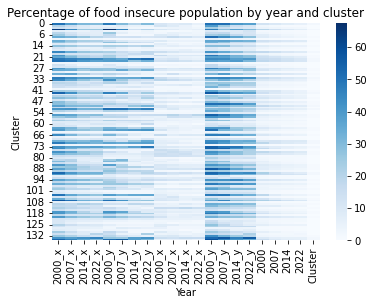

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# drop the string column (assuming it is called 'Country')
df_numeric = df.drop('Country', axis=1)

# create a heatmap using the numeric dataframe
sns.heatmap(df_numeric, cmap='Blues')

# add labels and title
plt.xlabel('Year')
plt.ylabel('Cluster')
plt.title('Percentage of food insecure population by year and cluster')

# display the plot
plt.show()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_16908\1353076169.py:19: FutureWarning: Passing 'suffixes' which cause duplicate columns {'2022_x', '2000_x', '2014_x', '2007_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, temp_df, on='Country', how='inner')
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


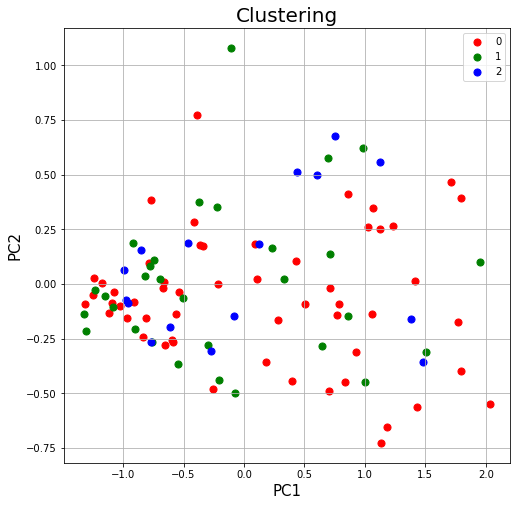

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# read in the datasets
datasets = ["GHI2022 scores.csv", "Proportion of undernourished in the population.csv", "Prevalence of wasting in children under five years.csv", 
"Prevalence of stunting in children under five years.csv","Under-five mortality rate.csv"]

# create an initial dataframe with the first dataset
df = pd.read_csv(datasets[0], encoding='unicode_escape')
df = df[['Country', '2000', '2007', '2014', '2022']]

# loop through the remaining datasets and join them on the 'Country' column
for dataset in datasets[1:]:
    temp_df = pd.read_csv(dataset, encoding='unicode_escape')
    temp_df = temp_df.drop_duplicates(subset='Country')
    df = pd.merge(df, temp_df, on='Country', how='inner')
    
# drop any rows with missing values
df.dropna(inplace=True)

# standardize the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.iloc[:, 1:])

# perform clustering analysis
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(df_scaled)

# add the cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# plot the clusters using the first two principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
finalDf = pd.concat([principalDf, df[['Cluster']]], axis=1)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_title('Clustering', fontsize=20)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], finalDf.loc[indicesToKeep, 'PC2'], c=color, s=50)

ax.legend(targets)
ax.grid()
plt.show()
